### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [1]:
# adding the important libraries
library(ggplot2)
library(scales)
library(lubridate)


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [2]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [3]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [4]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [5]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


### Question 1


**Your question 1 goes here** <br>
**Popular times of travel**<br>
What is the most common month?<br>
What is the most common day of week?<br>



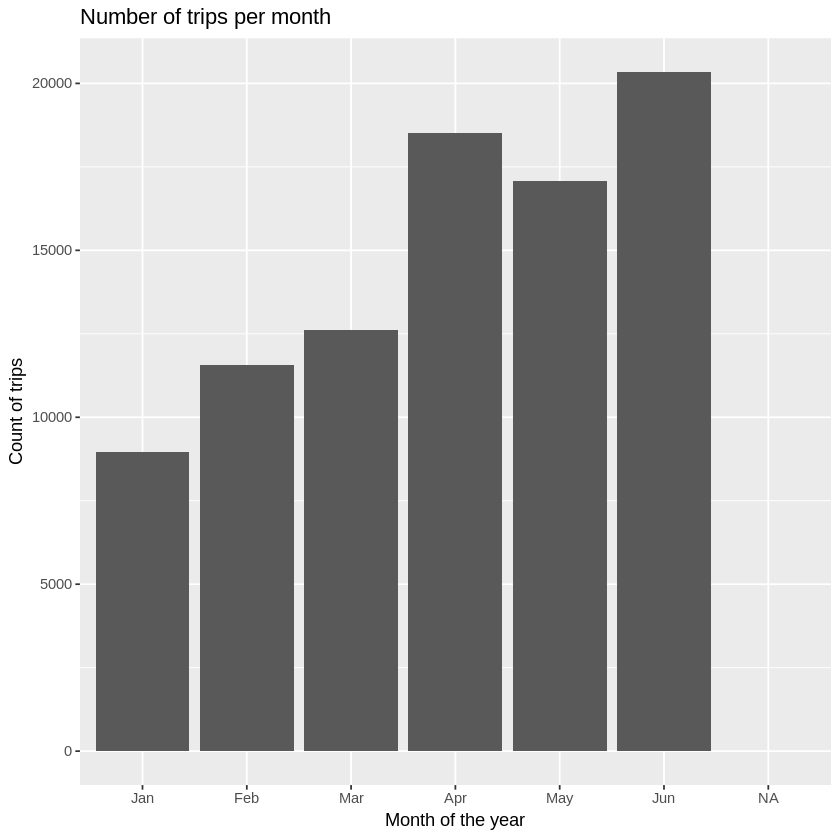

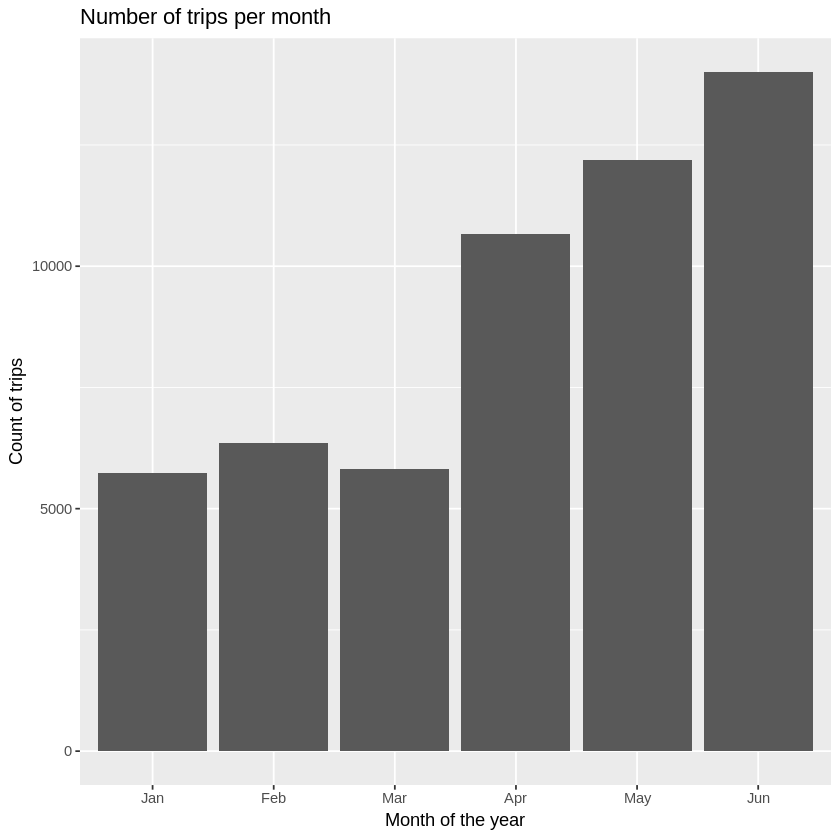

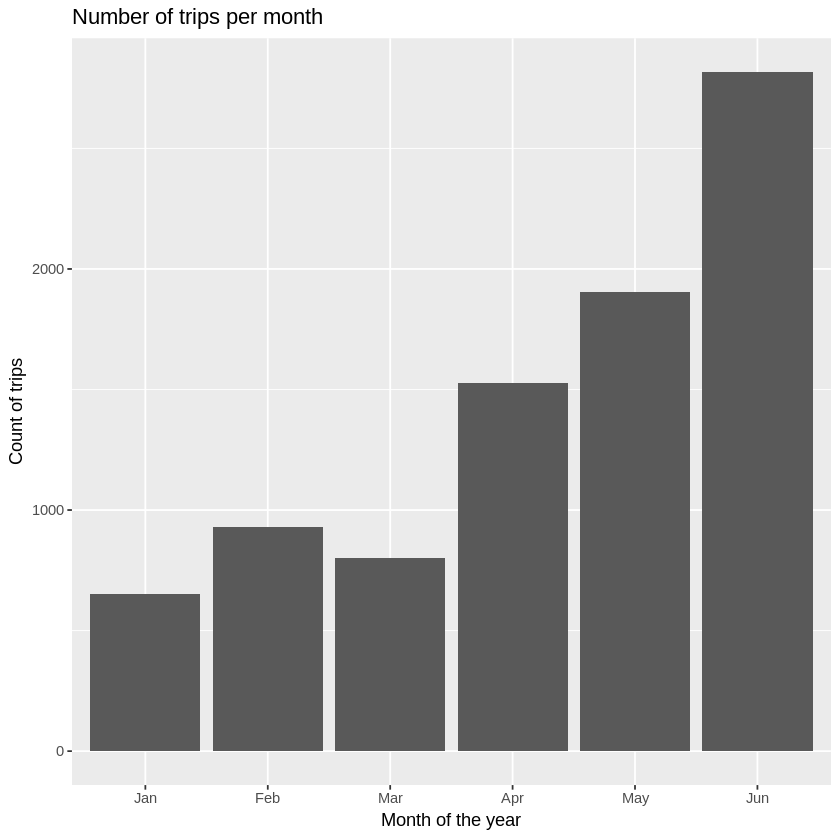

In [6]:
# coding a function to visualize the number of trips per month for each city
commonMonth <- function(data){
 
    data$Start.Time <- as.Date(data$Start.Time)

    ggplot(data, aes(format(Start.Time, '%m')))+
      geom_bar(stat = 'count')+
      scale_x_discrete(labels=c("Jan", "Feb", "Mar", "Apr", "May", "Jun")) +
      labs(x = "Month of the year", y = "Count of trips")+
      ggtitle("Number of trips per month")    
}
commonMonth(wash)
commonMonth(ny)
commonMonth(chi)

Warning message:
“Removed 1 rows containing non-finite values (stat_count).”

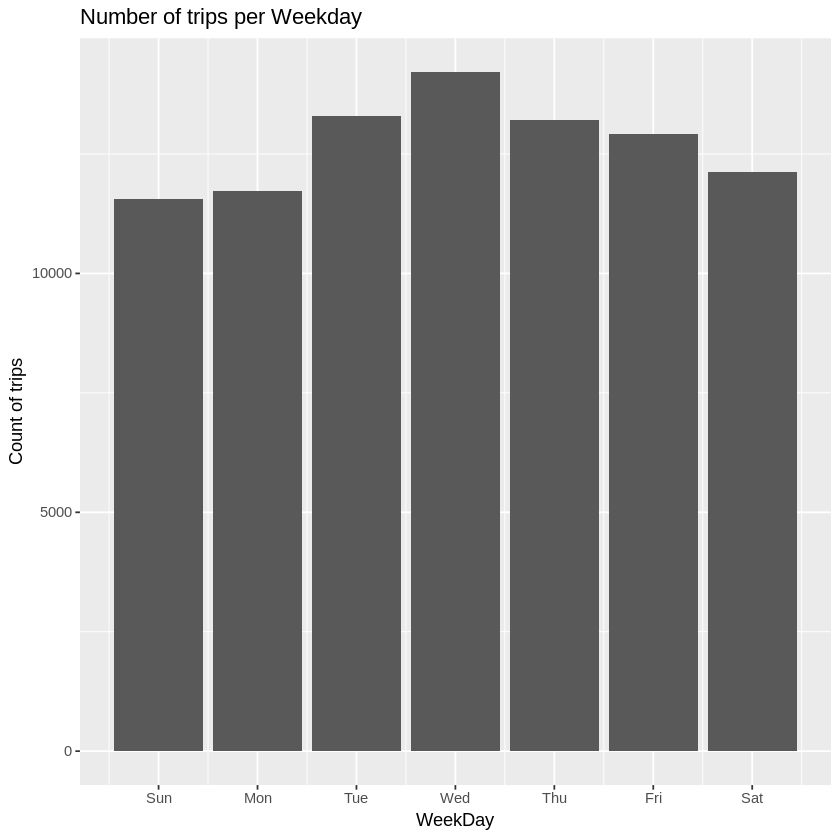

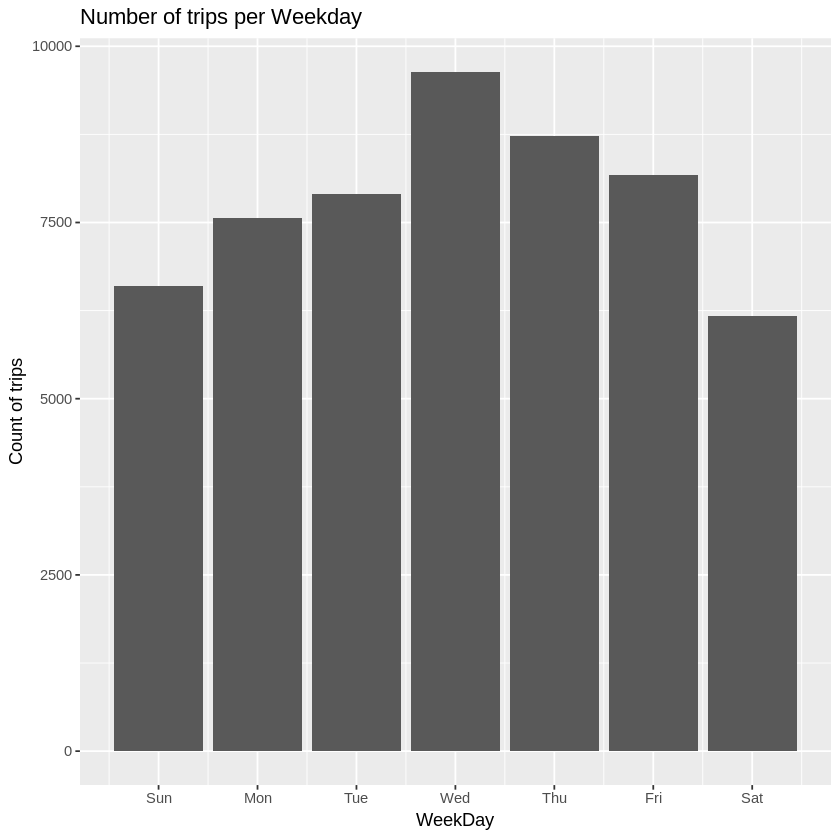

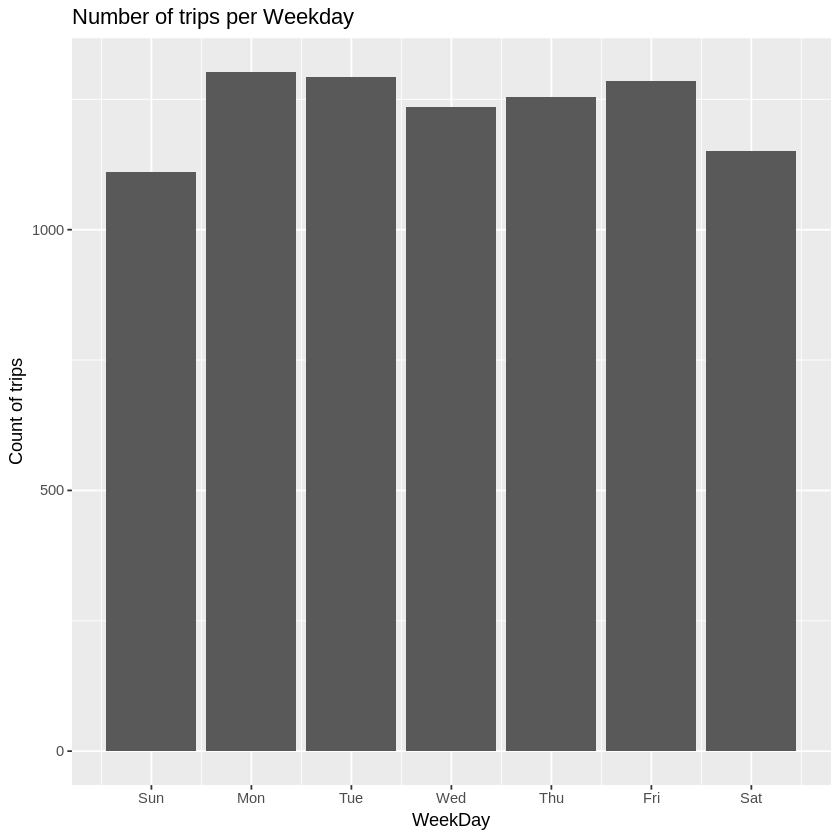

In [7]:
# coding a function to visualize the number of trips for each weekday for each city
weekday <- function(data){
    data$dayoftheweek <- wday(as.Date(data$Start.Time))
    ggplot(data, aes(dayoftheweek, stat='count'))+
    geom_bar()+
    scale_x_continuous(breaks=c(1,2,3,4,5,6,7), labels=c("Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat")) +
    labs(x = "WeekDay", y = "Count of trips")+
    ggtitle("Number of trips per Weekday")
}
weekday(wash)
weekday(ny)
weekday(chi)

**Summary of question 1 results goes here.**<br>
From the analysis above it appears that <br>
the most common month for the 3 cities is: June<br>
the most common day of the week is Wednesday for Washington and New-York and Monday for Chicago

### Question 2

**Popular stations and trip**<br>

What is the most common start station?<br>


In [8]:
# coding a function to get the most common start station for each city
commonstartStation <- function(data){
    commonstation <- unique(data$Start.Station)
    commonstation[which.max(tabulate(match(data$Start.Station, commonstation)))]   
}

commonstartStation(ny)
commonstartStation(chi)
commonstartStation(wash)

[1] Pershing Square North
636 Levels:  1 Ave & E 16 St 1 Ave & E 18 St 1 Ave & E 30 St ... York St & Jay St

[1] Streeter Dr & Grand Ave
472 Levels: 2112 W Peterson Ave 63rd St Beach ... Woodlawn Ave & Lake Park Ave

[1] Columbus Circle / Union Station
478 Levels:  10th & E St NW 10th & Florida Ave NW ... Yuma St & Tenley Circle NW

**Summary of your question 2 results goes here.**<br>
The most common start station for each city is :<br>
New-York: Pershing Square North<br>
Chicago: Streeter Dr & Grand Ave<br>
Washington: Columbus Circle / Union Station


### **Question 3: User info**<br>

What are the counts of each user type?<br>
What are the counts of each gender (only available for NYC and Chicago)?<br>


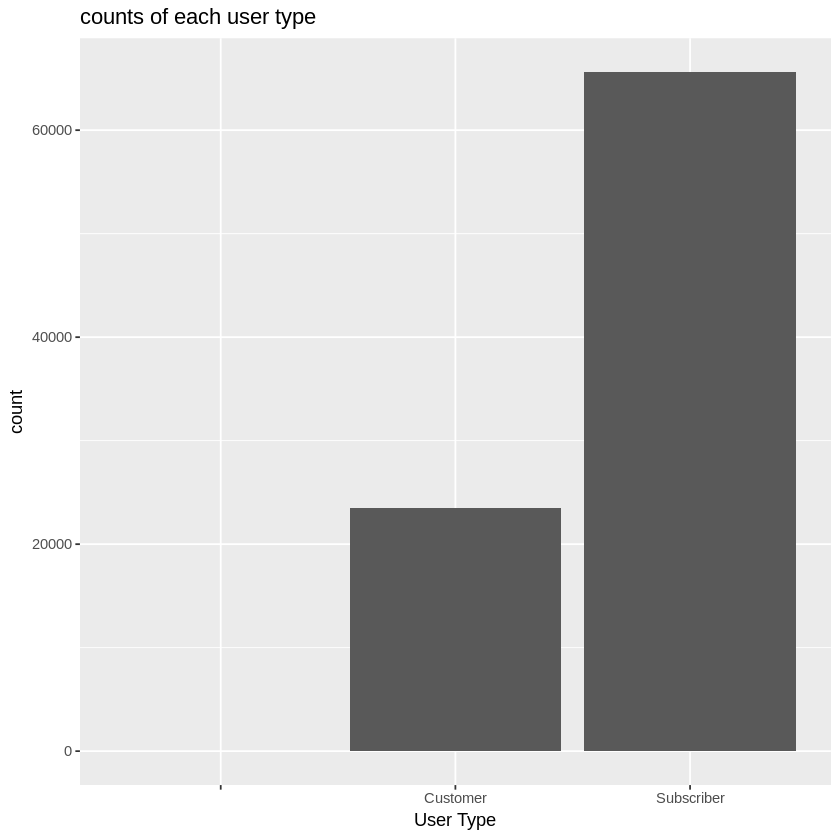

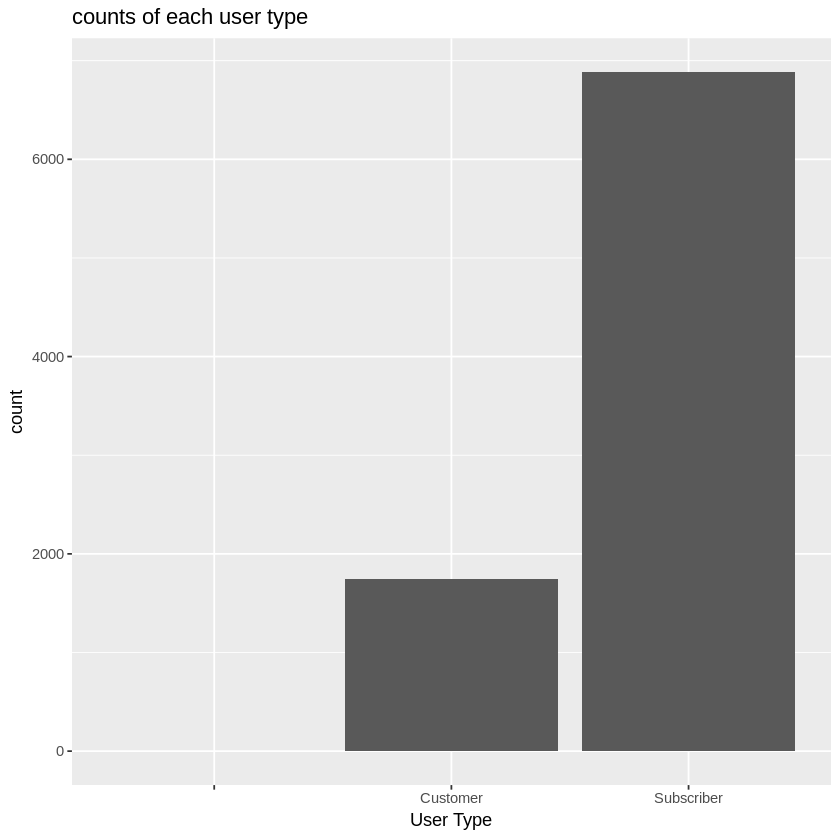

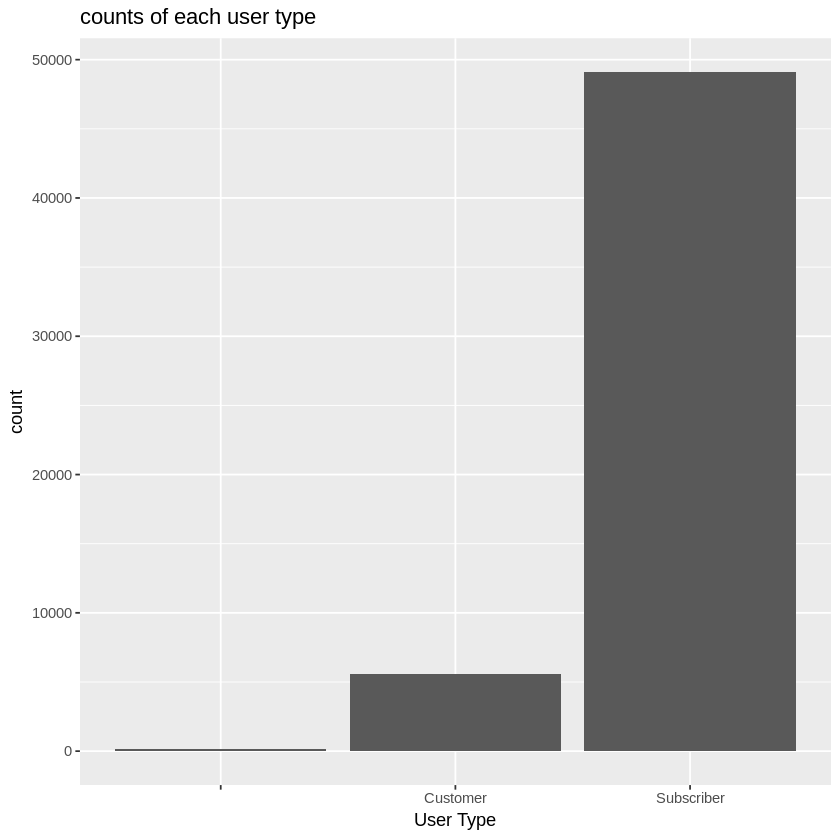

In [9]:
# coding a function to get the user type counts and visualization for each city
usercounts <- function(data){
    users_count <-summary(data$User.Type)
    ggplot(data, aes(x=User.Type, stat='count'))+
    geom_bar()+
    labs(x='User Type', y='count', title='counts of each user type')
    
}
usercounts(wash)
usercounts(chi)
usercounts(ny)

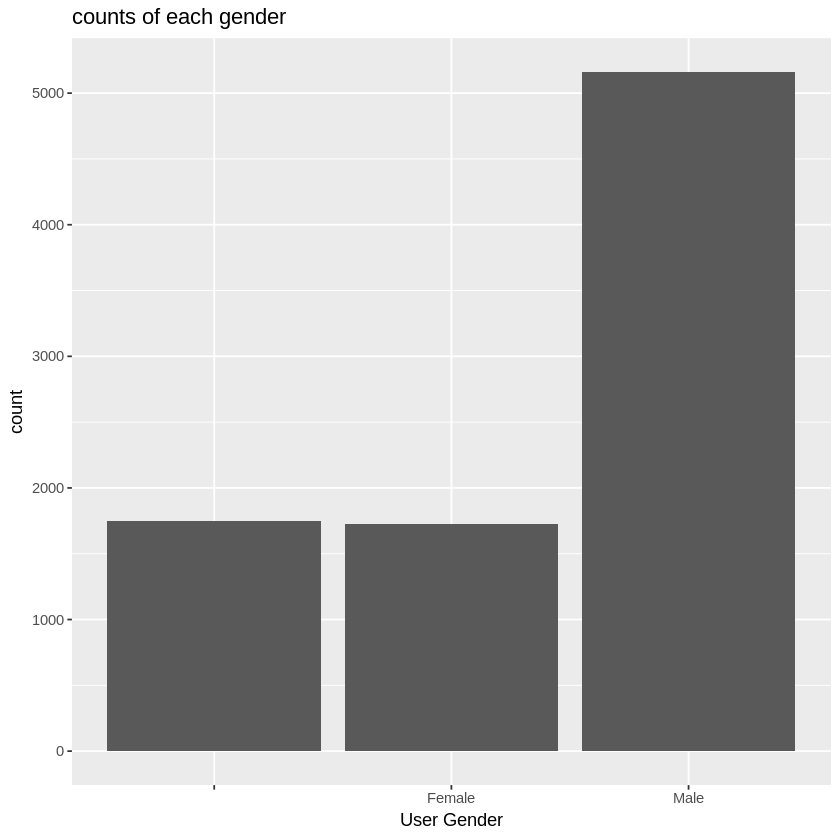

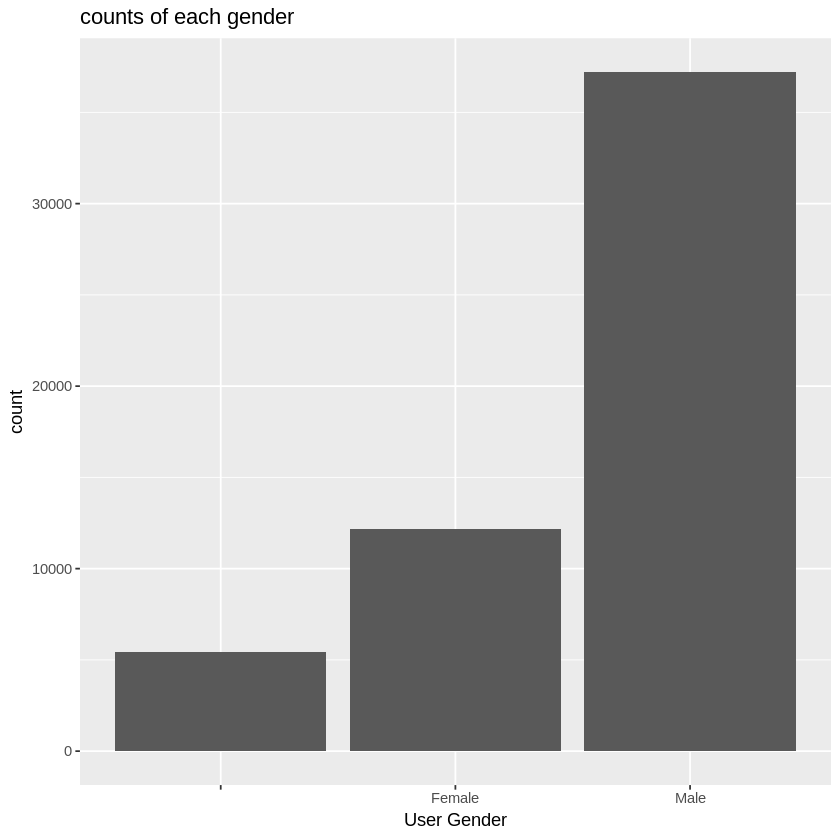

In [12]:
# coding a function to get the user gender counts and visualization for each city
usergender <- function(data){
    users_gender <-summary(data$Gender)
    ggplot(data, aes(x=Gender, stat='count'))+
    geom_bar()+
    labs(x='User Gender', y='count', title='counts of each gender')   
}
usergender(chi)
usergender(ny)

**Summary of your question 3 results goes here.**<br>
From the analysis above for the user info it is obvious that:<br>
Washington has more than 60000 subscriber and more than 20000 customer<br>
Chicago has more tahn 6000 subscriber and less than 2000 customer -------- more than 5000 male and less than 2000 female<br>
New-York has more than 45000 subscriber and more than 5000 customer -------- more than 350000 male and more than 10000 female




## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [11]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')